In [16]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../../data/csv/sentiment_text_top10.csv")
df.head()

,subreddit,title,selftext,subreddit.1,sentiment
0,FIFA,Honestly feels like cheating using mid Zidane.,NaN,FinalFantasy,pos
1,pokemon,Youtube Celebrity Logan Paul Turns Himself Int...,NaN,GTA,neg
2,GTA,GTA IV on mobile?,[removed],assassinscreed,neg
3,FIFA,Is there any trading patreon/discord you would...,[removed],pokemon,neg
4,FIFA,Rotten game. Rotten company.,[removed],pokemon,pos


In [6]:
df=df.drop("subreddit.1", axis=1)
df.head()

,subreddit,title,selftext,sentiment
0,FIFA,Honestly feels like cheating using mid Zidane.,NaN,pos
1,pokemon,Youtube Celebrity Logan Paul Turns Himself Int...,NaN,neg
2,GTA,GTA IV on mobile?,[removed],neg
3,FIFA,Is there any trading patreon/discord you would...,[removed],neg
4,FIFA,Rotten game. Rotten company.,[removed],pos


In [26]:
df.groupby(['subreddit','sentiment']).count()

title  selftext
subreddit      sentiment                 
CallOfDuty     neg          248       220
               neutral        2         1
               pos          882       770
FIFA           neg          721       616
               neutral        7         7
               pos         2284      1943
FinalFantasy   neg           95        61
               pos          316       245
GTA            neg          159       119
               neutral        2         2
               pos          432       325
SuperMario     neg            5         3
               pos           14         5
Tetris         neg           13        13
               pos           49        33
assassinscreed neg          121       114
               pos          413       382
legostarwars   neg          131        82
               neutral        6         4
               pos          516       306
pokemon        neg          663       535
               neutral        5         5
               pos         2279      1846
thesims        neg          154       125
               neutral        1         1
               pos          482       382

In [ ]:
df_use=df[df['sentiment']!='neutral']

In [63]:
df_use.groupby(['subreddit','sentiment']).count().reset_index()

,subreddit,sentiment,title,selftext
0,CallOfDuty,neg,248,220
1,CallOfDuty,pos,882,770
2,FIFA,neg,721,616
3,FIFA,pos,2284,1943
4,FinalFantasy,neg,95,61
5,FinalFantasy,pos,316,245
6,GTA,neg,159,119
7,GTA,pos,432,325
8,SuperMario,neg,5,3
9,SuperMario,pos,14,5


In [62]:
df_use.groupby(['subreddit','sentiment']).count()

title  selftext
subreddit      sentiment                 
CallOfDuty     neg          248       220
               pos          882       770
FIFA           neg          721       616
               pos         2284      1943
FinalFantasy   neg           95        61
               pos          316       245
GTA            neg          159       119
               pos          432       325
SuperMario     neg            5         3
               pos           14         5
Tetris         neg           13        13
               pos           49        33
assassinscreed neg          121       114
               pos          413       382
legostarwars   neg          131        82
               pos          516       306
pokemon        neg          663       535
               pos         2279      1846
thesims        neg          154       125
               pos          482       382

text

In [46]:
def find_most_common_words(text_column, n=5):
    # Preprocess the text (remove punctuation and convert to lowercase)
    text_column = text_column.str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Tokenize the text into words
    words = ' '.join(text_column).split()

    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Count word frequencies
    word_counts = Counter(words)

    # Find the n most common words
    most_common_words = word_counts.most_common(n)
    return most_common_words

# Call the function with your DataFrame
most_common_words = find_most_common_words(df['title'], n=20)

# Print the 5 most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")

game: 573
pokemon: 565
pokémon: 421
fifa: 397
help: 343
anyone: 339
get: 334
new: 298
cod: 290
like: 277
one: 270
team: 258
best: 251
play: 233
would: 224
games: 224
gta: 208
mw2: 208
first: 205
sims: 200


In [53]:
for category, group in grouped:
    category_df = pd.DataFrame(group)
    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['title'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    for word, count in most_common_words:
        print(f"{word}: {count}")
    

('CallOfDuty', 'neg') :
cod: 66
mw2: 38
call: 23
duty: 22
game: 20
get: 13
buy: 12
ops: 11
play: 10
steam: 10
warzone: 10
help: 10
black: 9
multiplayer: 9
cold: 8
war: 8
one: 8
best: 8
warfare: 8
campaign: 8
('CallOfDuty', 'pos') :
cod: 224
mw2: 169
duty: 77
call: 75
game: 64
warfare: 60
modern: 55
warzone: 39
play: 34
campaign: 34
anyone: 31
get: 30
help: 30
xbox: 30
games: 28
cant: 28
one: 27
ops: 26
best: 25
bo2: 25
('FIFA', 'neg') :
fifa: 95
game: 45
fut: 39
team: 38
anyone: 33
players: 30
get: 26
best: 26
help: 25
pack: 25
sbc: 25
toty: 22
player: 21
play: 21
time: 20
need: 18
squad: 17
card: 16
icon: 16
new: 15
('FIFA', 'pos') :
fifa: 301
game: 139
team: 122
fut: 111
player: 101
anyone: 86
get: 80
pack: 80
best: 78
play: 77
players: 72
help: 67
toty: 61
cant: 54
packs: 52
sbc: 50
one: 49
new: 47
squad: 46
playing: 46
('FinalFantasy', 'neg') :
final: 23
fantasy: 22
remake: 9
like: 5
game: 5
play: 5
xvi: 5
crisis: 5
core: 5
vii: 4
first: 4
store: 3
enemy: 3
favorite: 3
get: 3
playe

selftext

In [43]:
# Drop the missing values
df_filtered = df.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[deleted\]')]

# Call the function with your DataFrame
most_common_words = find_most_common_words(filtered_df['selftext'], n=20)

# Print the 5 most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")

game: 1429
like: 1283
im: 1006
would: 887
one: 822
pokemon: 805
get: 773
dont: 713
games: 678
pokémon: 639
know: 619
time: 533
also: 533
think: 523
ive: 514
play: 499
even: 496
really: 495
new: 462
could: 401


In [56]:
# Drop the missing values
df_filtered = df_use.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[delete\]')]

# Call the function with the DataFrame
most_common_words = find_most_common_words(filtered_df['selftext'], n=20)

# Print the 5 most common words and their frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")

game: 1421
like: 1274
deleted: 1114
would: 884
one: 819
pokemon: 805
get: 768
dont: 712
games: 678
pokémon: 636
know: 617
time: 533
also: 532
think: 522
ive: 511
play: 499
even: 496
really: 495
new: 461
could: 398


### Title

Total

C:\Users\84160\AppData\Local\Temp\ipykernel_16820\2641962878.py:2: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for category, group in grouped:


neg :
game: 127
pokemon: 120
pokémon: 96
fifa: 95
get: 89
anyone: 82
help: 79
new: 69
cod: 66
one: 63
team: 59
best: 57
like: 57
cant: 51
sims: 51
gta: 50
play: 50
games: 50
first: 46
would: 45


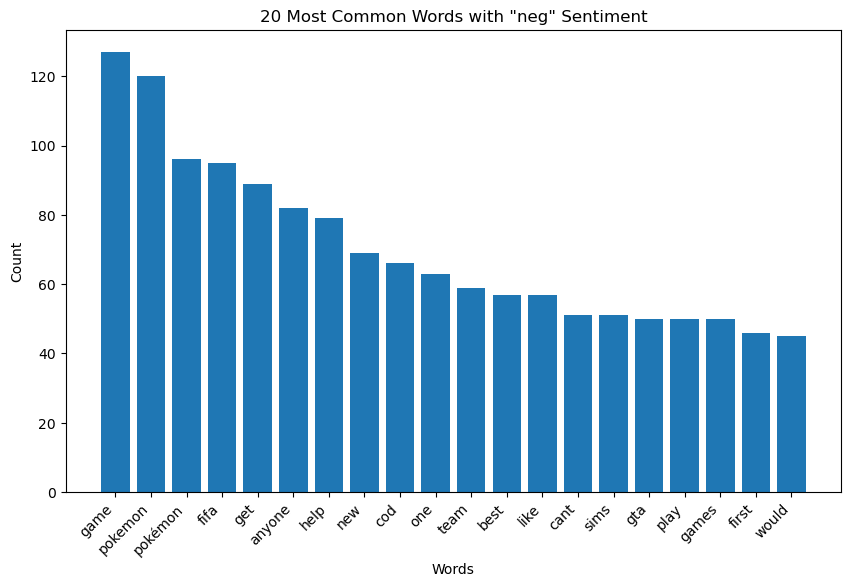

------------------------
------------------------
pos :
game: 445
pokemon: 445
pokémon: 323
fifa: 301
help: 261
anyone: 257
get: 244
new: 228
cod: 224
like: 220
one: 207
team: 199
best: 194
play: 183
would: 178
games: 174
mw2: 170
first: 159
gta: 157
think: 156


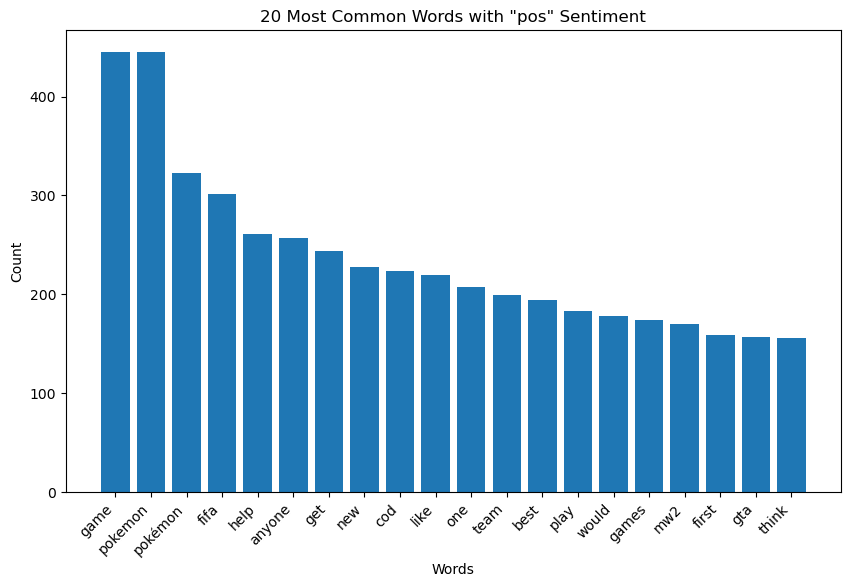

------------------------
------------------------


In [57]:
grouped = df_use.groupby(['sentiment'])
for category, group in grouped:
    category_df = pd.DataFrame(group)
    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['title'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words with "{category}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("------------------------")
    print("------------------------")

group by games

('CallOfDuty', 'neg') :
cod: 66
mw2: 38
call: 23
duty: 22
game: 20
get: 13
buy: 12
ops: 11
play: 10
steam: 10
warzone: 10
help: 10
black: 9
multiplayer: 9
cold: 8
war: 8
one: 8
best: 8
warfare: 8
campaign: 8


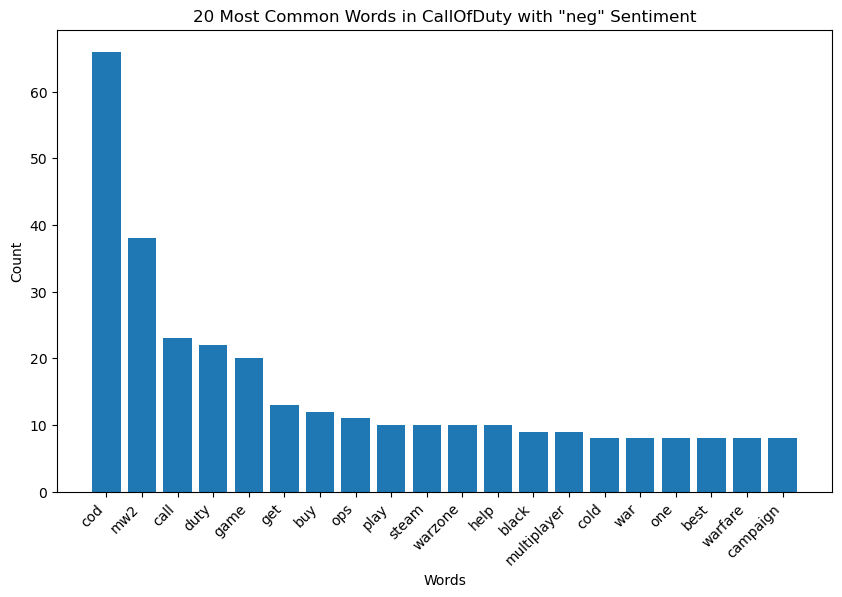

------------------------
------------------------
('CallOfDuty', 'pos') :
cod: 224
mw2: 169
duty: 77
call: 75
game: 64
warfare: 60
modern: 55
warzone: 39
play: 34
campaign: 34
anyone: 31
get: 30
help: 30
xbox: 30
games: 28
cant: 28
one: 27
ops: 26
best: 25
bo2: 25


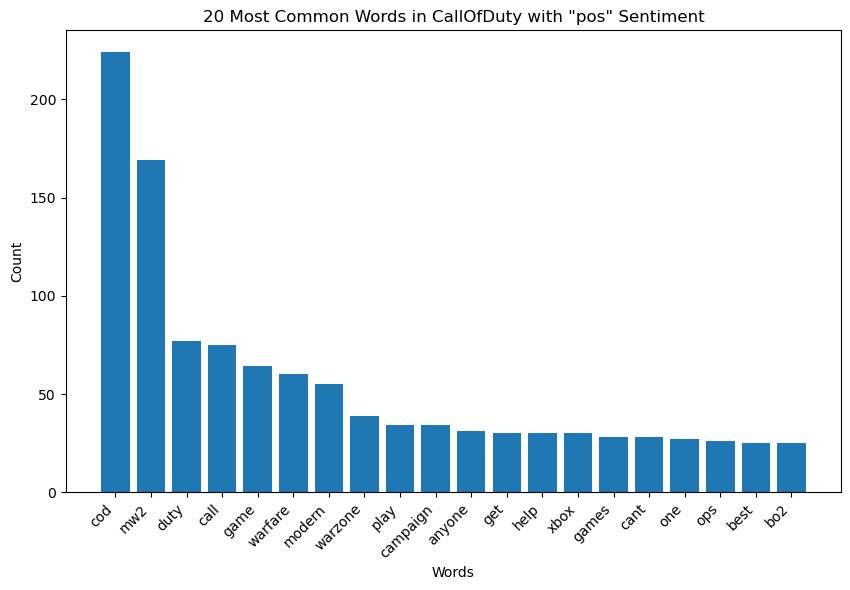

------------------------
------------------------
('FIFA', 'neg') :
fifa: 95
game: 45
fut: 39
team: 38
anyone: 33
players: 30
get: 26
best: 26
help: 25
pack: 25
sbc: 25
toty: 22
player: 21
play: 21
time: 20
need: 18
squad: 17
card: 16
icon: 16
new: 15


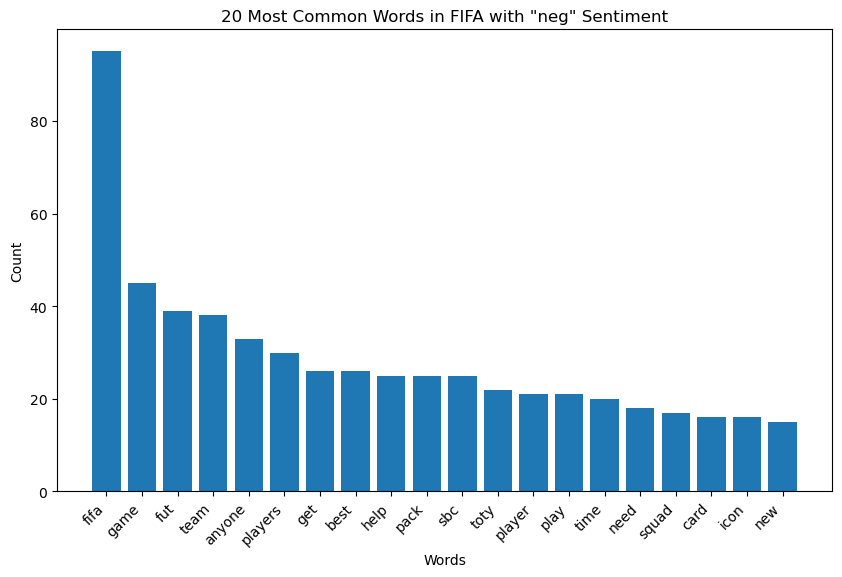

------------------------
------------------------
('FIFA', 'pos') :
fifa: 301
game: 139
team: 122
fut: 111
player: 101
anyone: 86
get: 80
pack: 80
best: 78
play: 77
players: 72
help: 67
toty: 61
cant: 54
packs: 52
sbc: 50
one: 49
new: 47
squad: 46
playing: 46


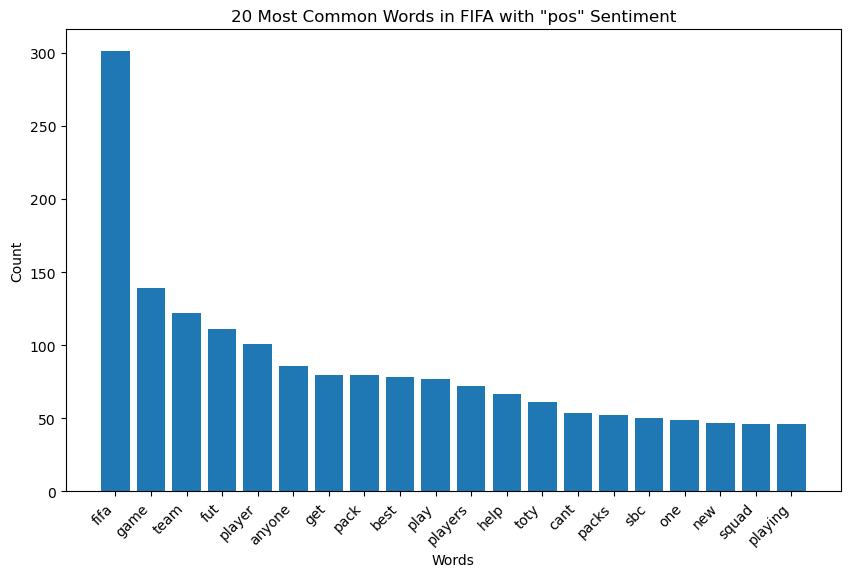

------------------------
------------------------
('FinalFantasy', 'neg') :
final: 23
fantasy: 22
remake: 9
like: 5
game: 5
play: 5
xvi: 5
crisis: 5
core: 5
vii: 4
first: 4
store: 3
enemy: 3
favorite: 3
get: 3
played: 3
want: 3
art: 3
arts: 3
ffxiv: 2


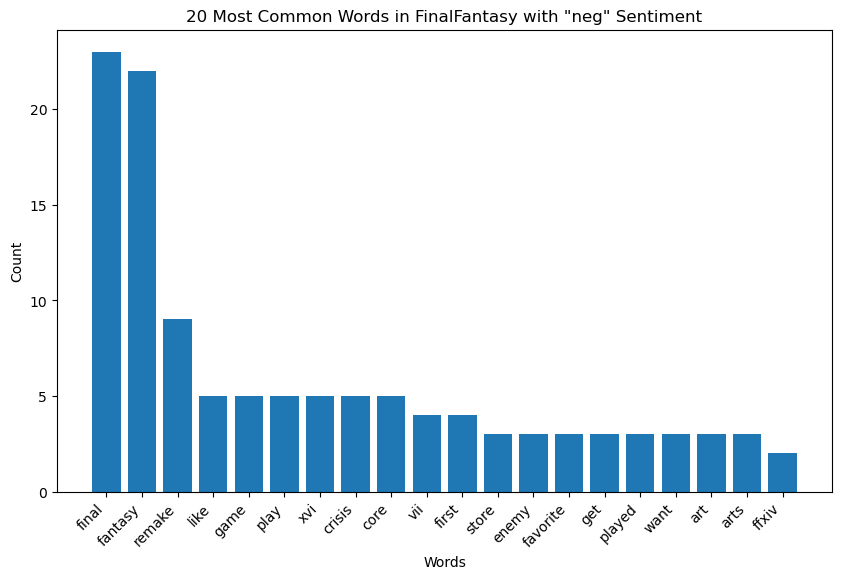

------------------------
------------------------
('FinalFantasy', 'pos') :
final: 65
fantasy: 59
play: 20
game: 19
first: 18
remake: 15
ff7: 14
one: 13
time: 13
like: 12
games: 11
playing: 11
character: 10
ffvii: 9
anyone: 9
pixel: 9
remaster: 9
new: 9
art: 9
best: 8


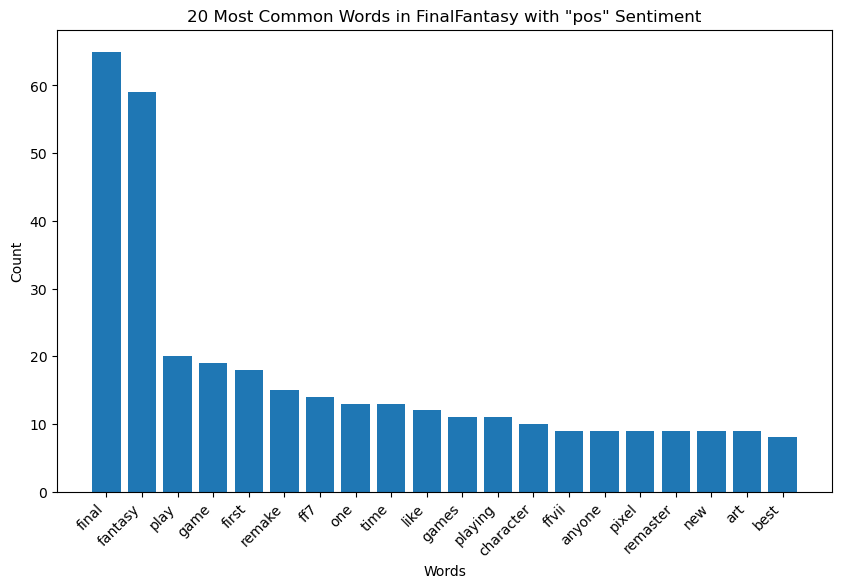

------------------------
------------------------
('GTA', 'neg') :
gta: 50
online: 10
definitive: 9
deleted: 8
user: 8
edition: 8
help: 8
trilogy: 6
anyone: 6
san: 6
andreas: 6
get: 5
ps5: 5
map: 5
money: 5
buy: 5
first: 5
cant: 5
cars: 4
dlc: 4


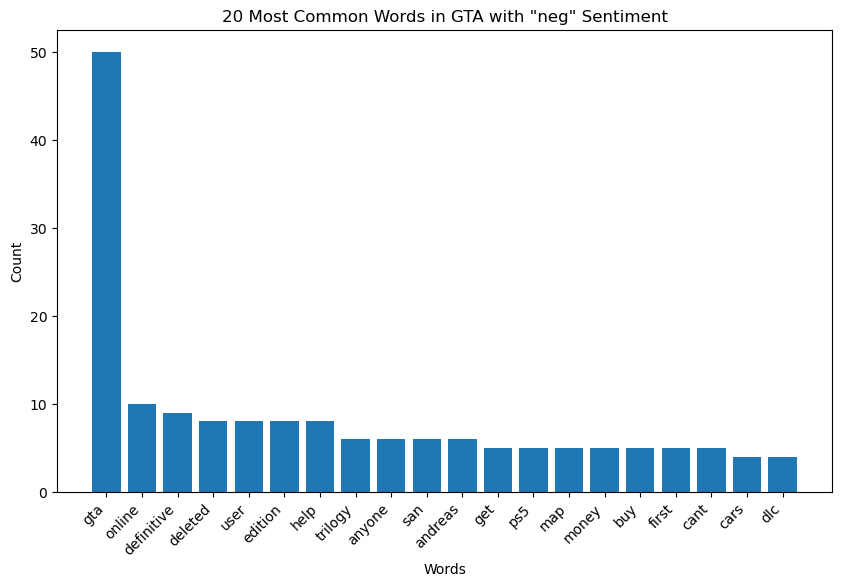

------------------------
------------------------
('GTA', 'pos') :
gta: 157
like: 22
help: 20
san: 20
andreas: 20
story: 20
online: 20
edition: 17
game: 17
definitive: 16
city: 16
rockstar: 15
trilogy: 14
map: 13
anyone: 13
get: 13
deleted: 12
user: 12
still: 11
version: 10


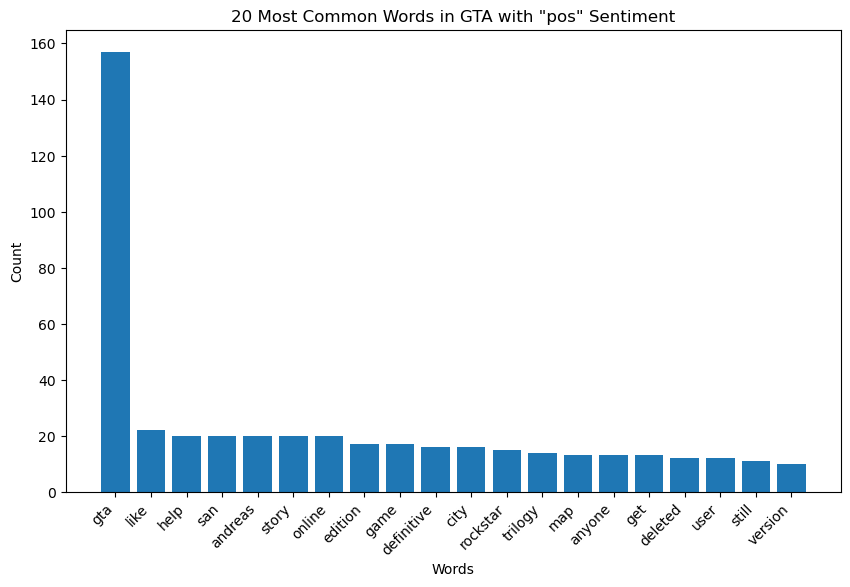

------------------------
------------------------
('SuperMario', 'neg') :
mario: 3
super: 2
boom: 2
would: 1
kidnap: 1
peach: 1
9999999: 1
bowser: 1
made: 1
demake: 1
sunshine: 1
gameboy: 1
color: 1
wants: 1
heat: 1
qui: 1
préférezvous: 1
dans: 1
challenge: 1


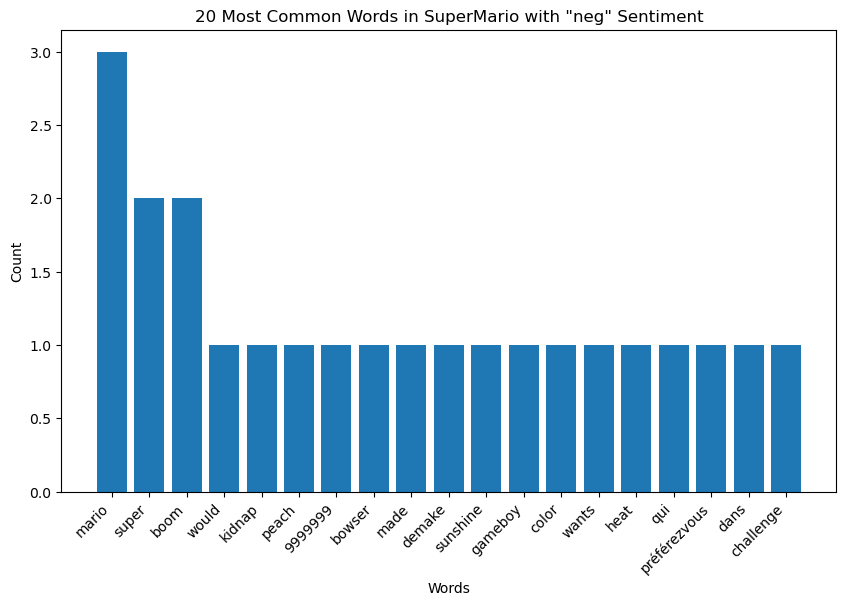

------------------------
------------------------
('SuperMario', 'pos') :
mario: 10
super: 7
bros: 4
movie: 3
amp: 2
new: 2
game: 2
switch: 2
games: 2
stop: 1
spoiling: 1
truff: 1
hot: 1
sauce: 1
collection: 1
announced: 1
dragon: 1
quest: 1
chrono: 1
trigger: 1


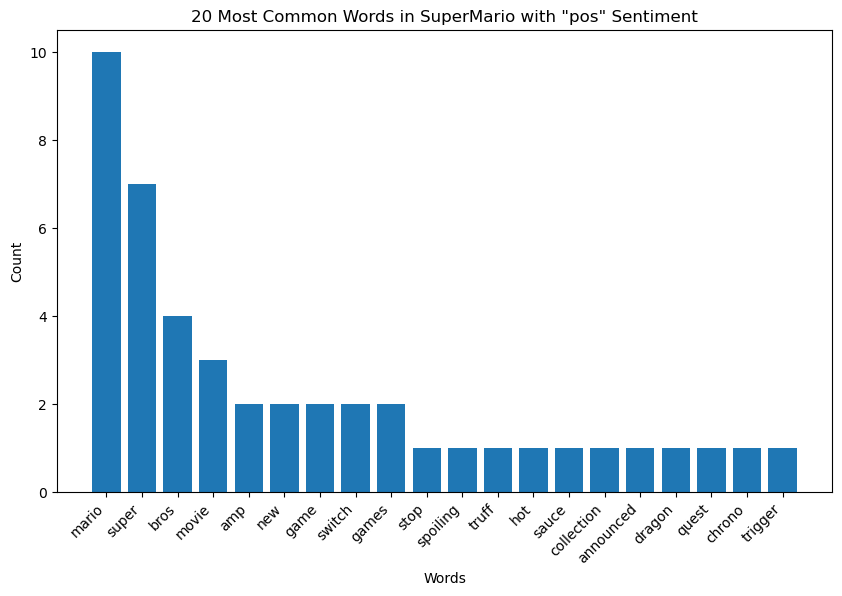

------------------------
------------------------
('Tetris', 'neg') :
tetris: 3
new: 2
effect: 2
data: 2
ffs: 1
whats: 1
easiest: 1
way: 1
get: 1
tspins: 1
lines: 1
249k: 1
tetrio: 1
mobile: 1
reaaaally: 1
unresponsive: 1
high: 1
score: 1
tetrismobile: 1
app: 1


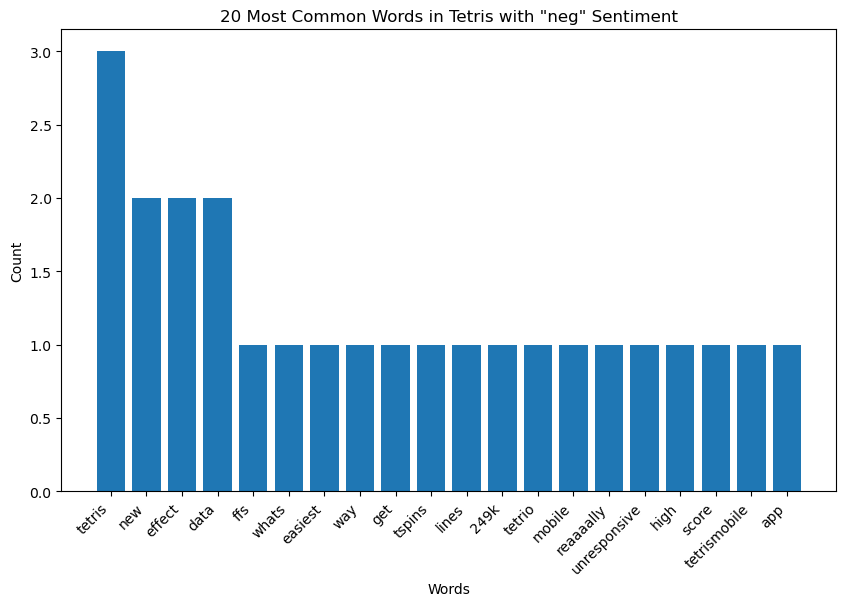

------------------------
------------------------
('Tetris', 'pos') :
tetris: 18
line: 4
tetrio: 4
anyone: 3
mobile: 3
game: 3
time: 3
playing: 3
score: 3
mode: 3
sprint: 2
peices: 2
tips: 2
literally: 2
high: 2
play: 2
match: 2
got: 2
movie: 2
good: 2


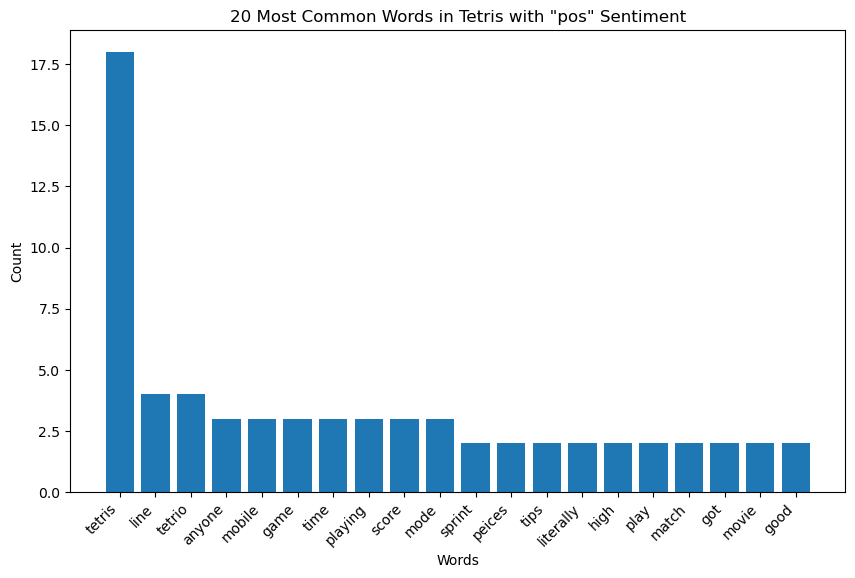

------------------------
------------------------
('assassinscreed', 'neg') :
assassins: 29
creed: 29
games: 13
valhalla: 13
odyssey: 13
unity: 11
series: 9
xbox: 8
origins: 7
game: 7
get: 7
like: 7
syndicate: 6
one: 6
dlc: 5
playing: 5
good: 5
cant: 5
best: 4
first: 4


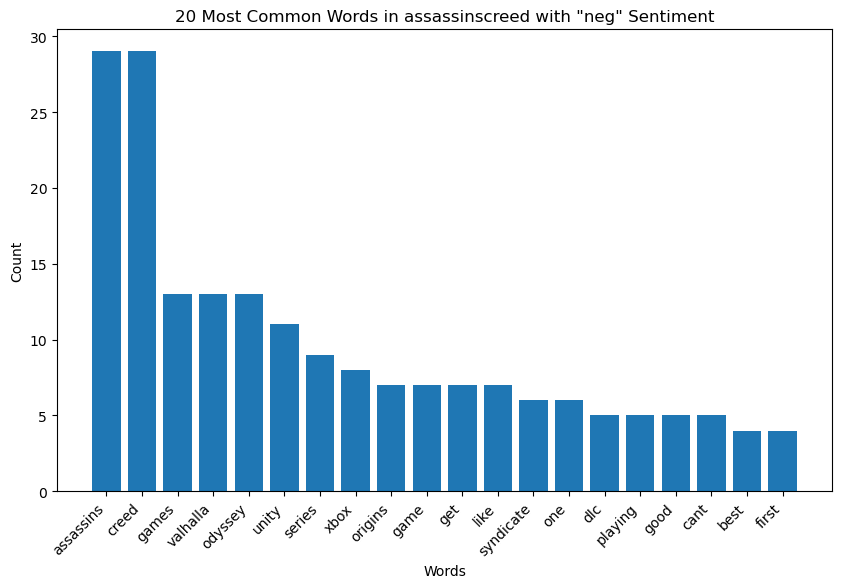

------------------------
------------------------
('assassinscreed', 'pos') :
assassins: 89
creed: 87
game: 68
valhalla: 34
would: 24
unity: 23
odyssey: 23
like: 21
series: 17
origins: 17
games: 16
ezio: 15
play: 15
best: 14
black: 14
flag: 14
help: 14
get: 14
spoilers: 13
time: 13


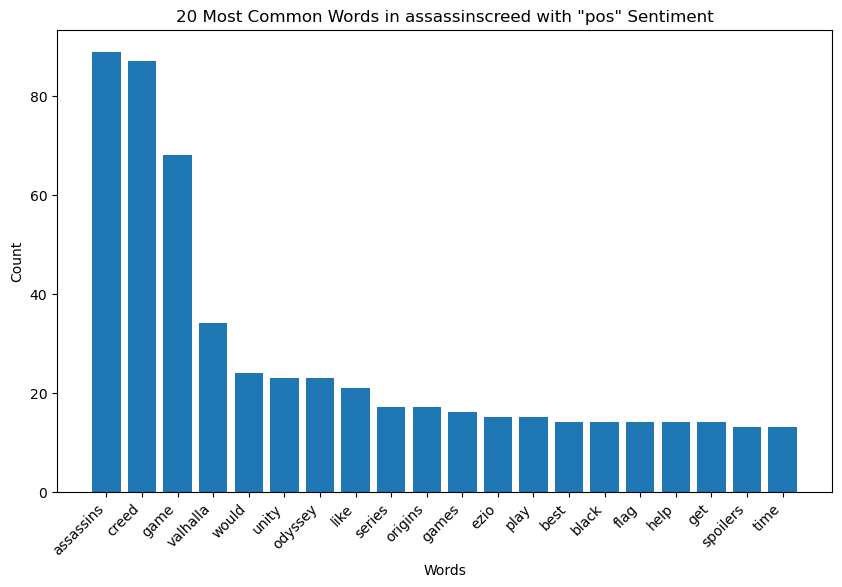

------------------------
------------------------
('legostarwars', 'neg') :
set: 13
lego: 13
moc: 11
made: 10
clone: 8
imperial: 8
build: 7
first: 7
ucs: 6
star: 6
wars: 6
collection: 6
new: 5
minifigs: 5
sets: 4
help: 4
figures: 4
worth: 4
good: 4
cant: 4


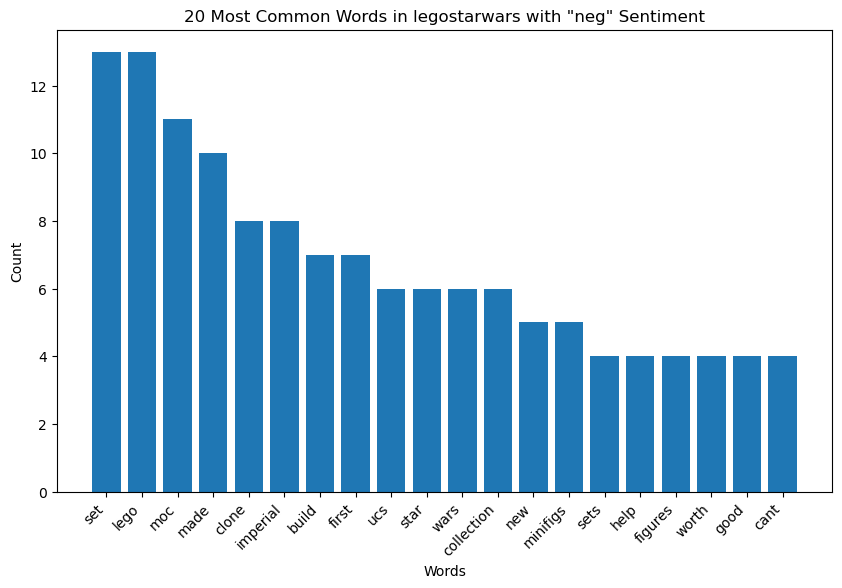

------------------------
------------------------
('legostarwars', 'pos') :
lego: 71
set: 42
star: 39
wars: 36
collection: 31
got: 29
moc: 24
anyone: 24
found: 23
new: 22
one: 21
good: 19
sets: 19
ucs: 19
minifigs: 18
buy: 18
worth: 17
first: 16
made: 16
clone: 15


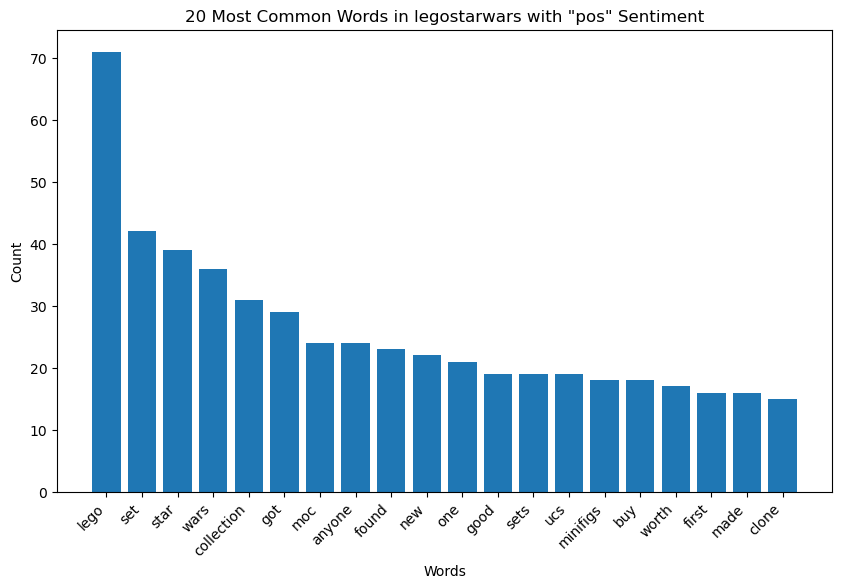

------------------------
------------------------
('pokemon', 'neg') :
pokemon: 120
pokémon: 96
game: 32
gen: 29
get: 27
one: 23
anyone: 22
help: 22
team: 20
new: 20
shiny: 19
like: 19
favorite: 19
would: 19
know: 18
made: 17
type: 16
ive: 16
love: 15
think: 15


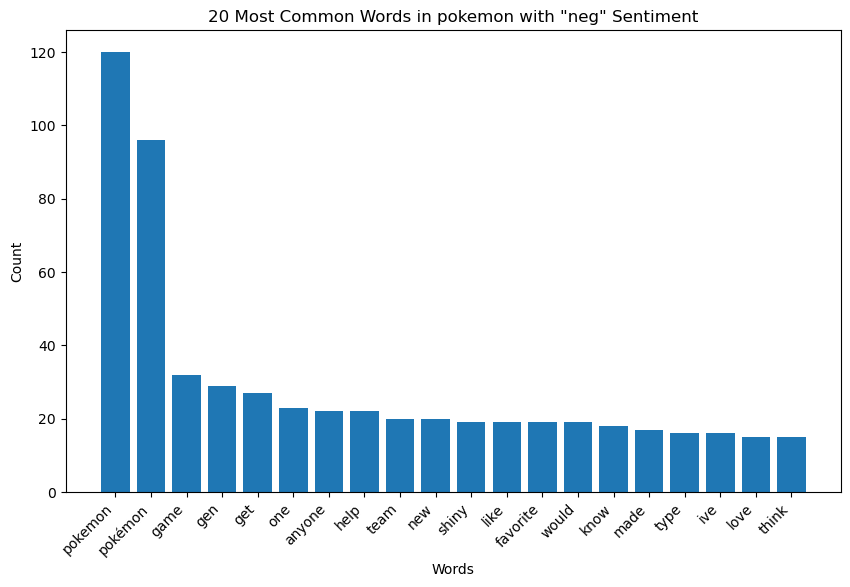

------------------------
------------------------
('pokemon', 'pos') :
pokemon: 445
pokémon: 323
game: 100
would: 88
like: 87
new: 86
help: 83
shiny: 78
get: 73
team: 72
games: 71
gen: 67
think: 65
one: 64
need: 63
violet: 61
favorite: 60
anyone: 55
made: 54
scarlet: 52


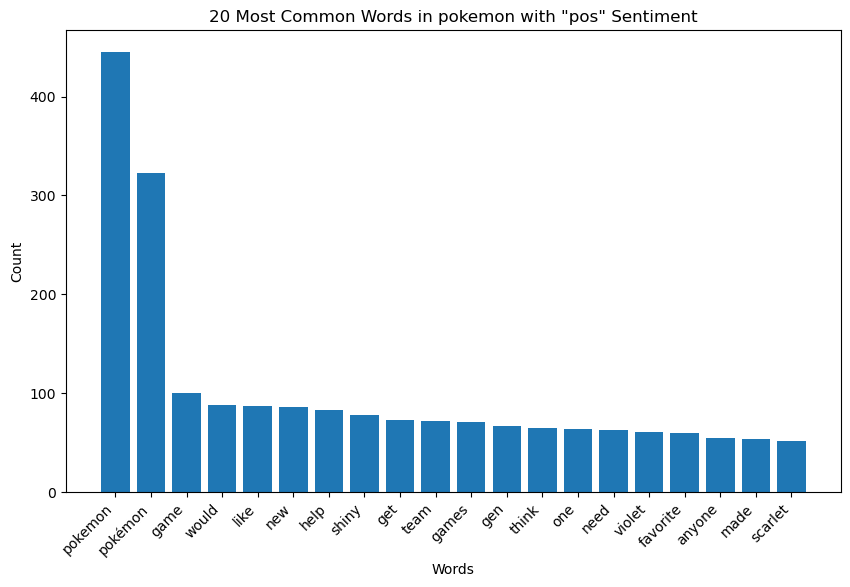

------------------------
------------------------
('thesims', 'neg') :
sims: 51
game: 14
new: 13
anyone: 9
like: 7
sim: 6
think: 6
using: 6
house: 6
need: 6
infants: 6
please: 6
help: 6
one: 5
save: 5
app: 5
would: 4
know: 4
years: 4
pack: 4


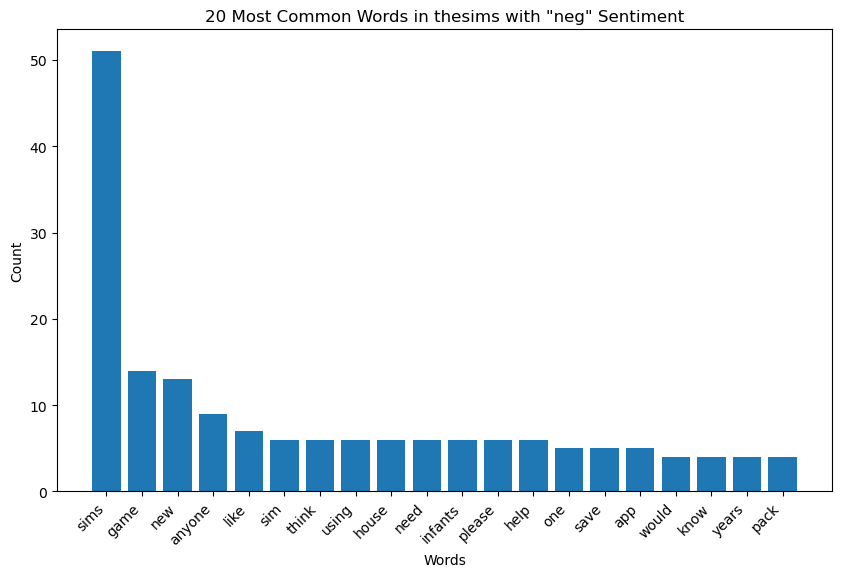

------------------------
------------------------
('thesims', 'pos') :
sims: 148
help: 34
game: 30
sim: 27
anyone: 24
new: 23
cant: 18
mods: 17
family: 15
know: 14
want: 14
one: 14
play: 14
think: 14
like: 13
first: 12
get: 12
update: 12
app: 12
made: 11


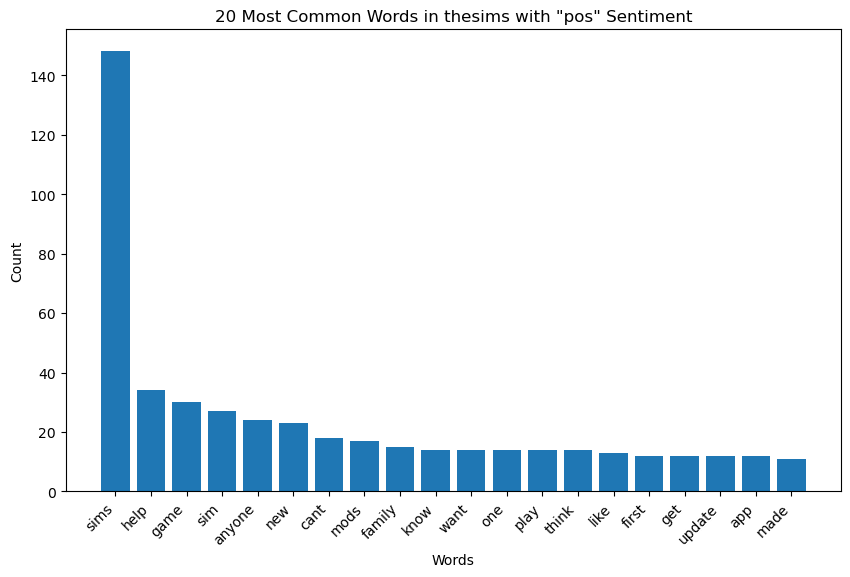

------------------------
------------------------


In [58]:
df_use=df[df['sentiment']!='neutral']
grouped = df_use.groupby(['subreddit','sentiment'])
for category, group in grouped:
    category_df = pd.DataFrame(group)
    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['title'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    for word, count in most_common_words:
        print(f"{word}: {count}")
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words in {category[0]} with "{category[1]}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print("------------------------")
    print("------------------------")

### self_text

all games

C:\Users\84160\AppData\Local\Temp\ipykernel_16820\3817110532.py:9: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for category, group in grouped:


neg :
game: 328
like: 318
would: 200
games: 194
get: 179
pokemon: 175
one: 173
know: 149
also: 143
pokémon: 142
time: 132
dont: 129
really: 121
play: 114
ive: 113
new: 108
even: 108
think: 99
could: 98
since: 94


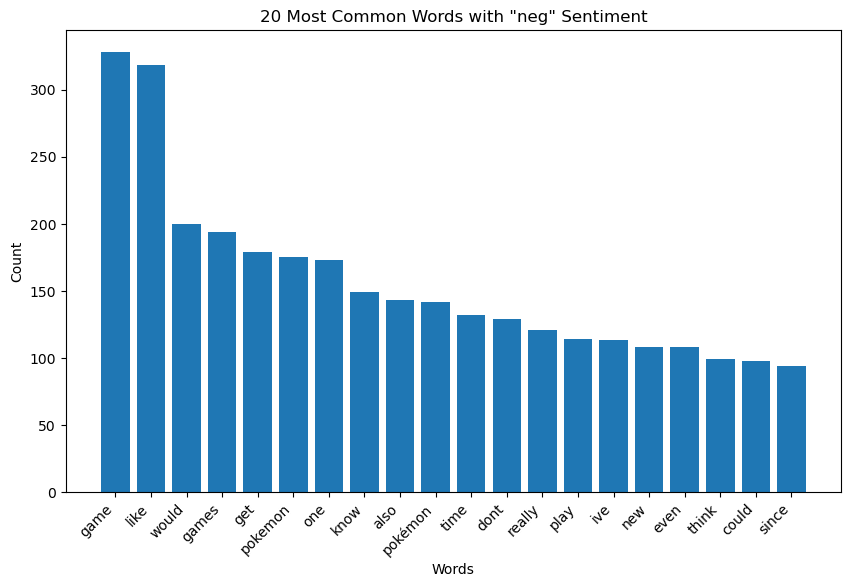

------------------------
------------------------
pos :
game: 1093
like: 956
would: 684
one: 646
pokemon: 630
get: 589
dont: 583
pokémon: 494
games: 484
know: 468
think: 423
time: 401
ive: 398
also: 389
even: 388
play: 385
really: 374
new: 353
make: 306
could: 300


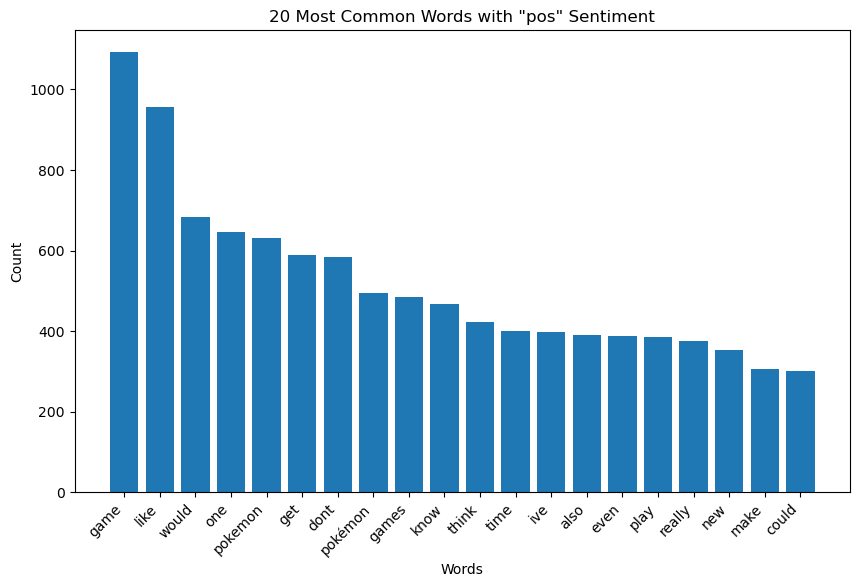

------------------------
------------------------


In [59]:
# Drop the missing values
df_filtered = df_use.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[deleted\]')]

grouped = filtered_df.groupby(['sentiment'])

for category, group in grouped:
    category_df = pd.DataFrame(group)


    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['selftext'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    for word, count in most_common_words:
        print(f"{word}: {count}")
    
    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words with "{category}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print("------------------------")
    print("------------------------")

filter games

('CallOfDuty', 'neg') :
cod: 17
game: 16
know: 13
games: 12
like: 12
dont: 11
even: 8
cant: 8
really: 7
play: 7
still: 6
good: 6
anyone: 6
online: 6
playing: 5
call: 5
duty: 5
want: 5
since: 5
time: 5


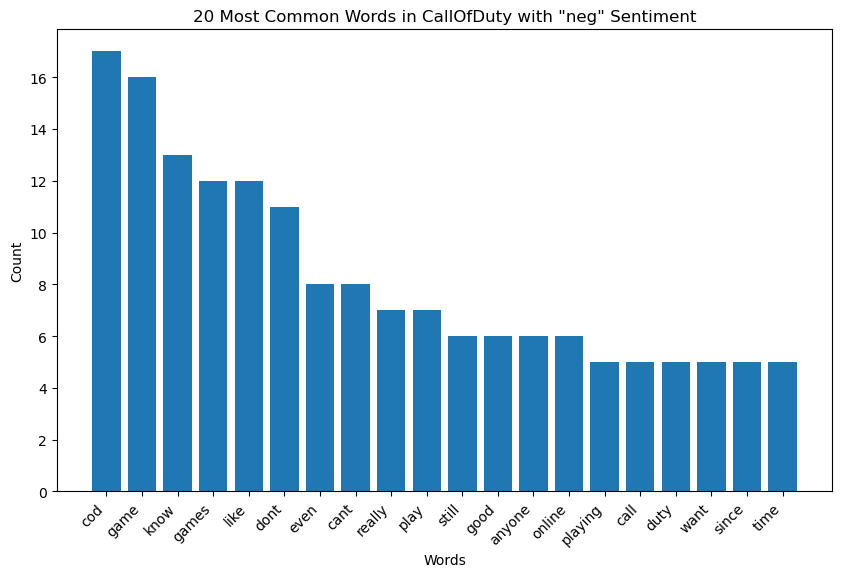

------------------------
------------------------
('CallOfDuty', 'pos') :
game: 49
play: 33
would: 30
like: 30
cod: 27
games: 26
one: 26
dont: 21
xbox: 21
get: 20
call: 20
think: 20
know: 19
duty: 18
ops: 17
want: 16
black: 15
zombies: 14
really: 14
bo2: 14


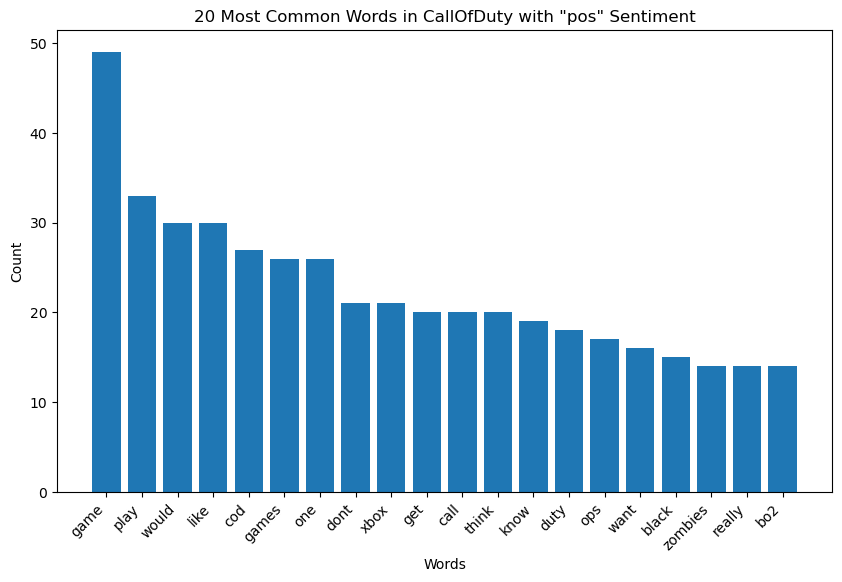

------------------------
------------------------
('FIFA', 'neg') :
game: 51
games: 36
get: 31
like: 31
play: 30
players: 30
fifa: 29
would: 24
know: 24
dont: 23
player: 21
time: 21
good: 20
teams: 19
even: 19
data: 19
one: 18
anyone: 18
ive: 18
best: 17


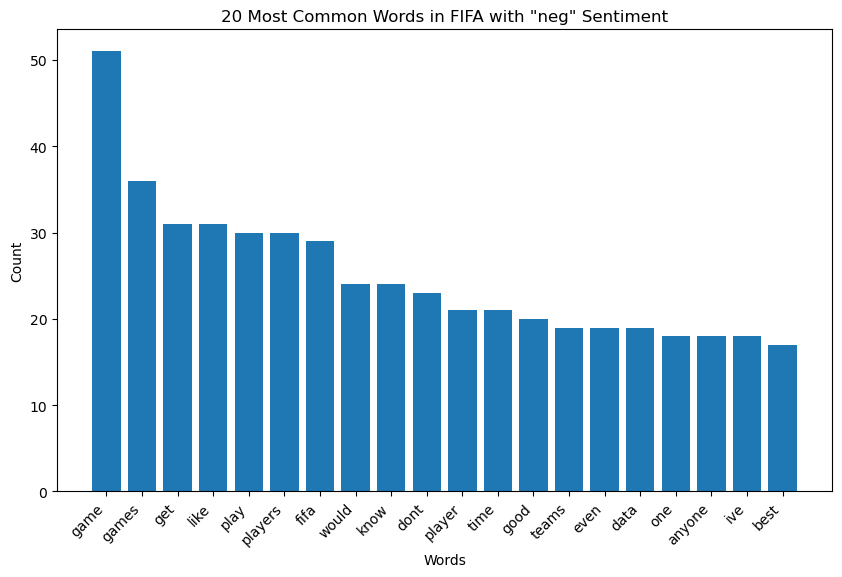

------------------------
------------------------
('FIFA', 'pos') :
player: 152
game: 138
like: 133
dont: 122
players: 120
get: 109
play: 106
good: 100
fifa: 95
posts: 90
one: 81
better: 78
ball: 75
ive: 68
back: 61
even: 60
playing: 60
best: 60
discussion: 60
questions: 60


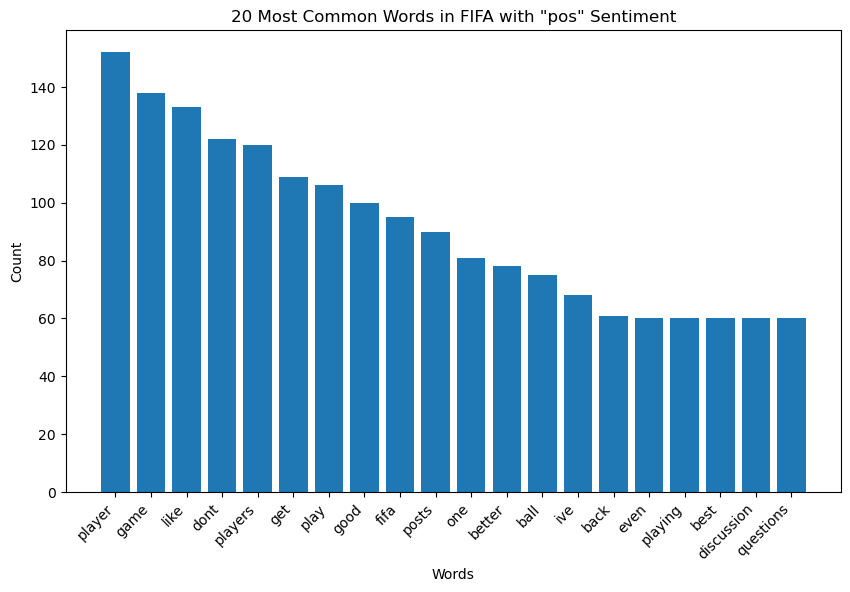

------------------------
------------------------
('FinalFantasy', 'neg') :
game: 46
final: 26
fantasy: 23
games: 18
also: 16
like: 16
story: 13
get: 11
play: 11
know: 11
since: 10
series: 10
theme: 10
feel: 9
even: 9
way: 9
first: 9
end: 8
going: 8
cloud: 8


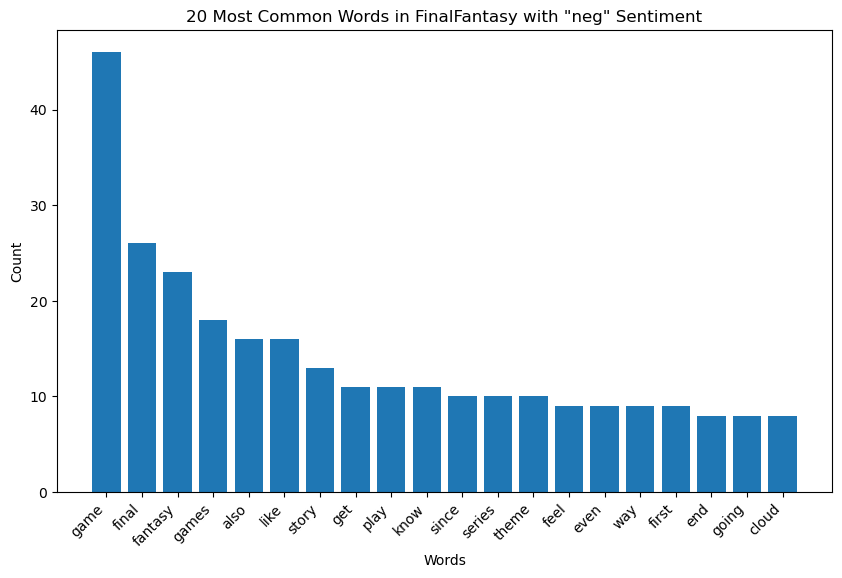

------------------------
------------------------
('FinalFantasy', 'pos') :
game: 118
like: 96
final: 69
fantasy: 56
would: 49
one: 48
dont: 44
games: 44
think: 42
story: 40
first: 40
really: 39
play: 39
get: 38
time: 38
also: 36
ive: 33
characters: 33
know: 33
played: 32


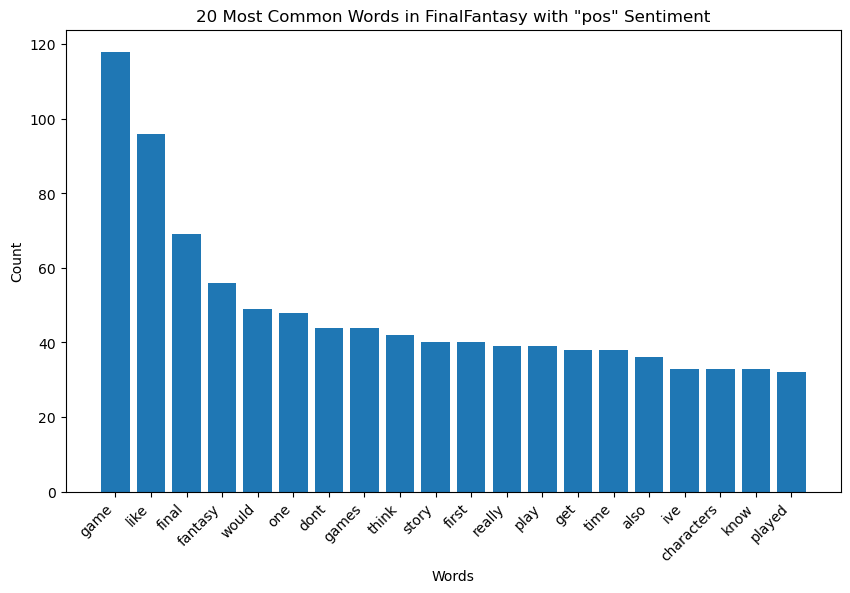

------------------------
------------------------
('GTA', 'neg') :
gta: 34
would: 19
play: 18
get: 15
like: 14
time: 13
help: 12
game: 12
cant: 11
games: 11
one: 11
ive: 11
could: 9
online: 8
anyone: 8
playing: 8
want: 8
story: 8
missions: 8
miami: 8


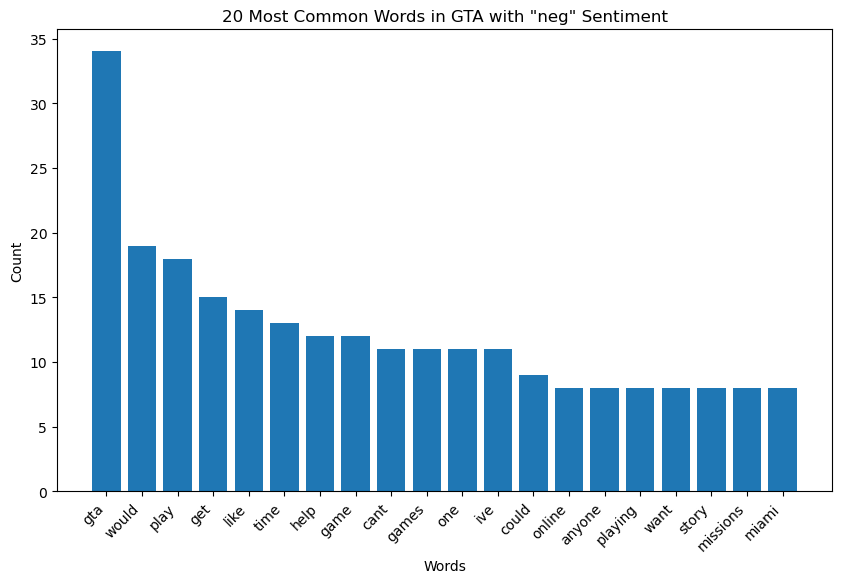

------------------------
------------------------
('GTA', 'pos') :
gta: 128
game: 65
like: 47
niko: 47
know: 38
get: 37
michael: 36
online: 27
dont: 27
help: 26
money: 25
time: 25
trevor: 25
new: 24
city: 24
games: 24
make: 23
one: 23
see: 22
play: 22


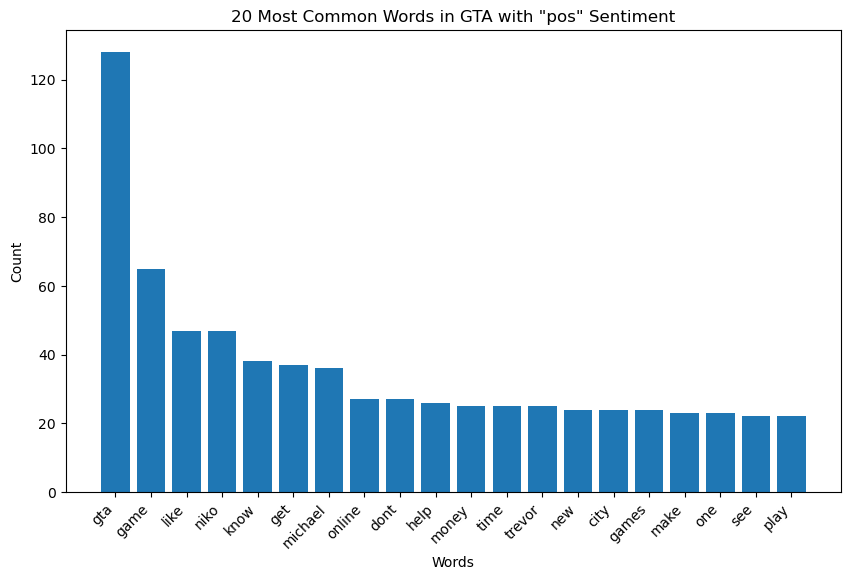

------------------------
------------------------
('SuperMario', 'neg') :
view: 2
pollhttpswwwredditcompoll10w2s5h: 1
pollhttpswwwredditcompollzqtcui: 1


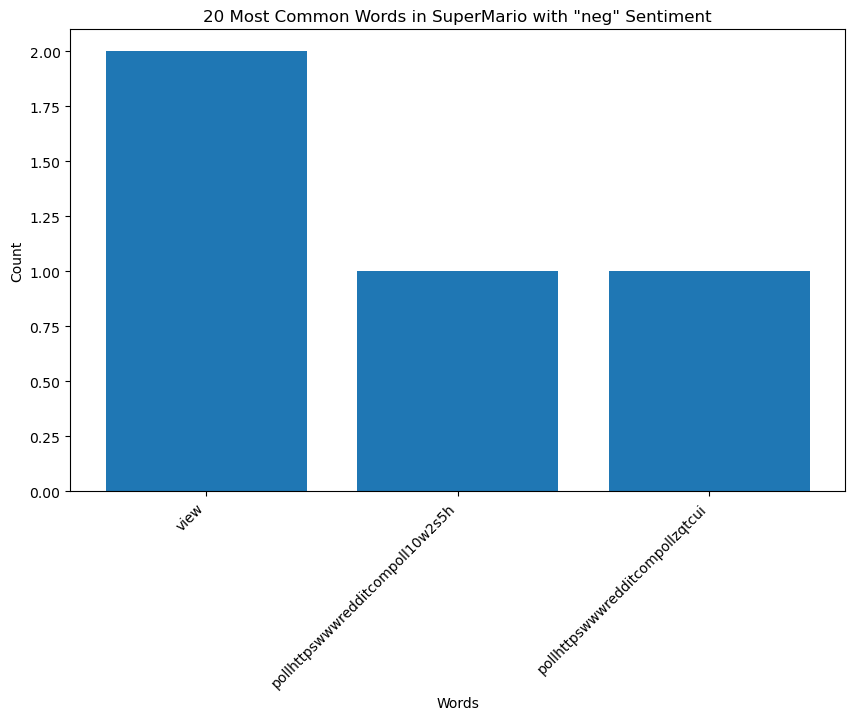

------------------------
------------------------
('SuperMario', 'pos') :
movie: 3
stop: 3
see: 3
game: 3
saw: 2
lot: 2
footages: 2
please: 2
would: 2
baby: 2
yoshi: 2
videos: 1
internet: 1
mario: 1
want: 1
becuase: 1
spoils: 1
people: 1
guys: 1
wanna: 1


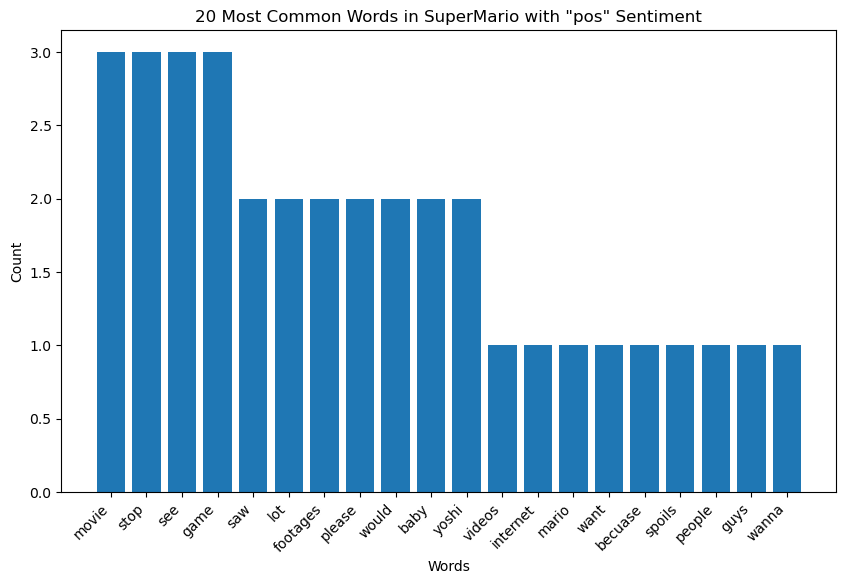

------------------------
------------------------
('Tetris', 'neg') :
tetris: 3
switch: 3
high: 2
get: 2
work: 2
anyone: 2
week: 2
playing: 2
effect: 2
oculus: 2
quest: 2
pps: 2
losing: 2
ive: 2
ampx200b: 1
httpsjstrisjezevec10comreplay39307009httpspreviewredditzsiftsmsuqg71pngwidth242ampformatpngampautowebpamps6cc691444ab4eb35d2318a74f82909768e1a0751: 1
tried: 1
mechanical: 1
struggled: 1
last: 1


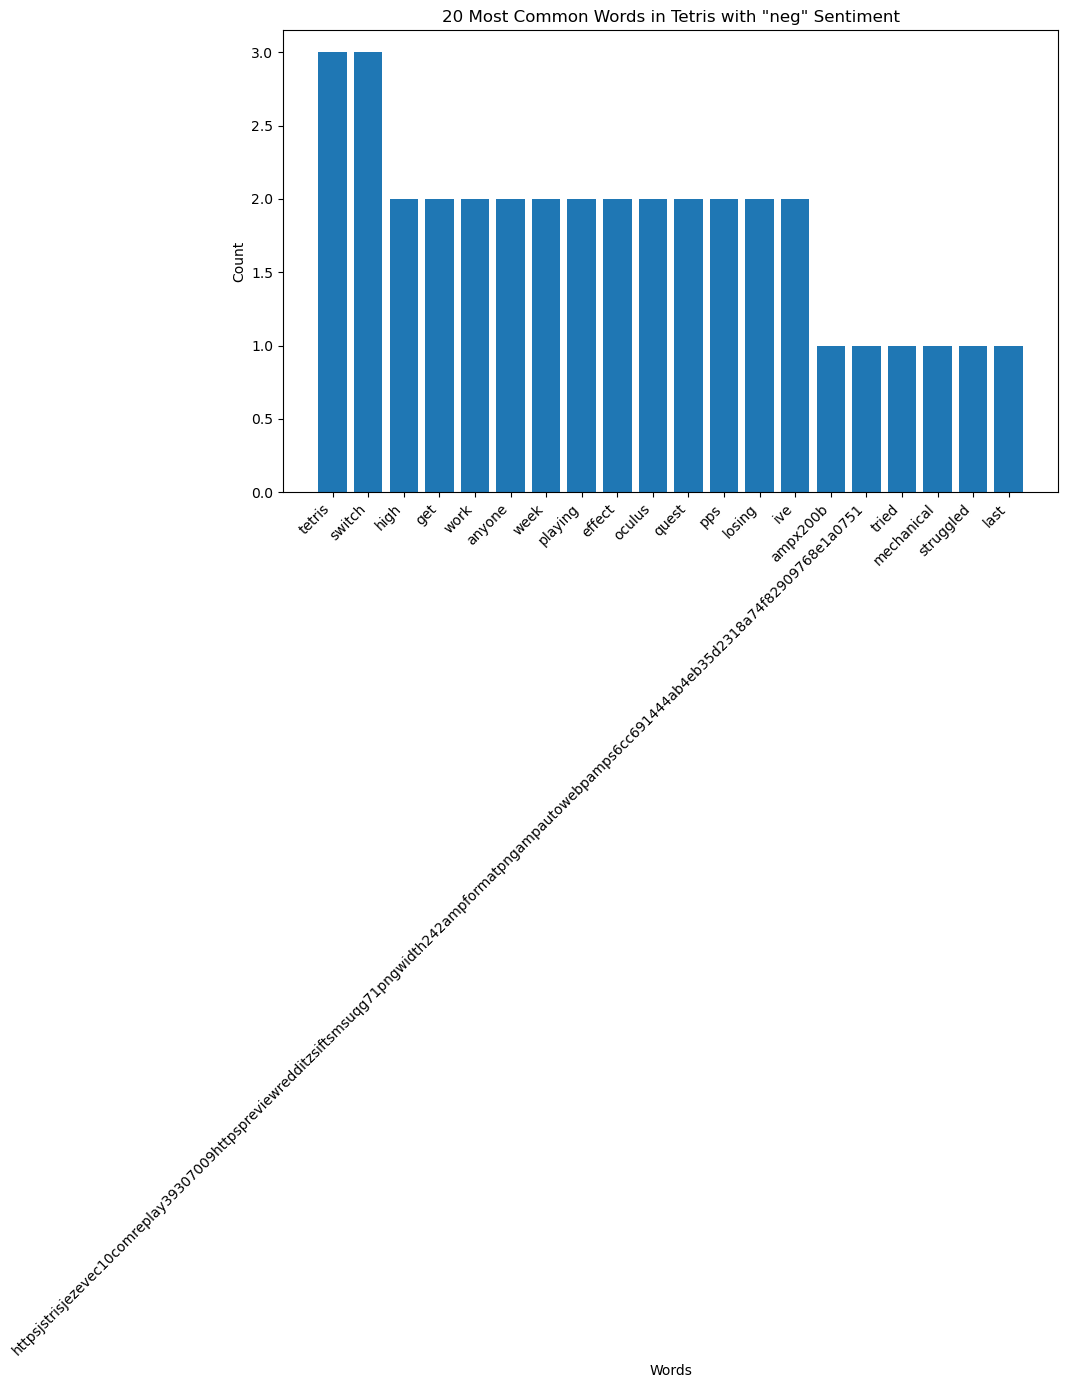

------------------------
------------------------
('Tetris', 'pos') :
get: 17
tetris: 14
game: 9
play: 9
tki: 9
see: 8
much: 8
like: 7
ive: 7
way: 6
tier: 6
high: 6
rank: 6
lines: 6
dont: 6
trying: 5
would: 5
good: 5
time: 5
clear: 5


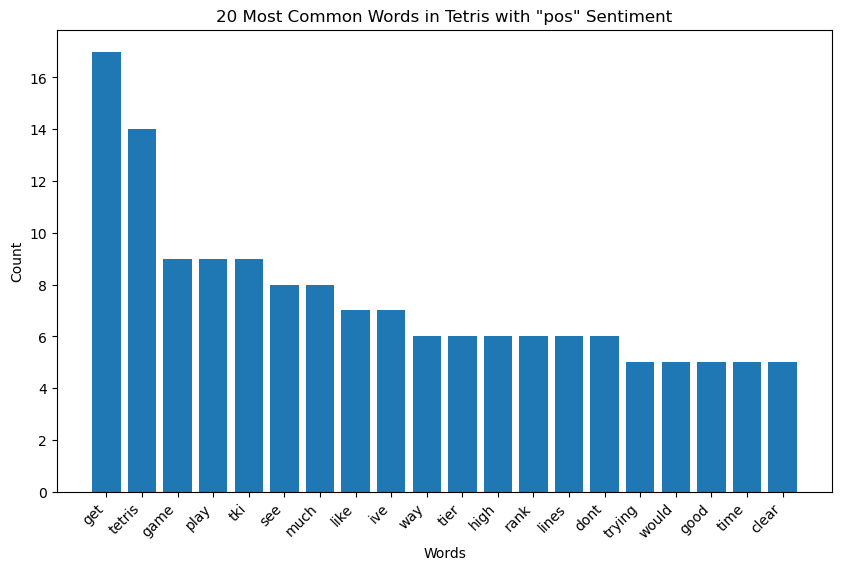

------------------------
------------------------
('assassinscreed', 'neg') :
game: 56
like: 42
one: 35
assassins: 32
games: 26
time: 26
would: 25
get: 22
odyssey: 22
know: 21
really: 20
also: 20
creed: 18
ive: 17
playing: 17
valhalla: 16
origins: 15
story: 15
could: 14
dont: 14


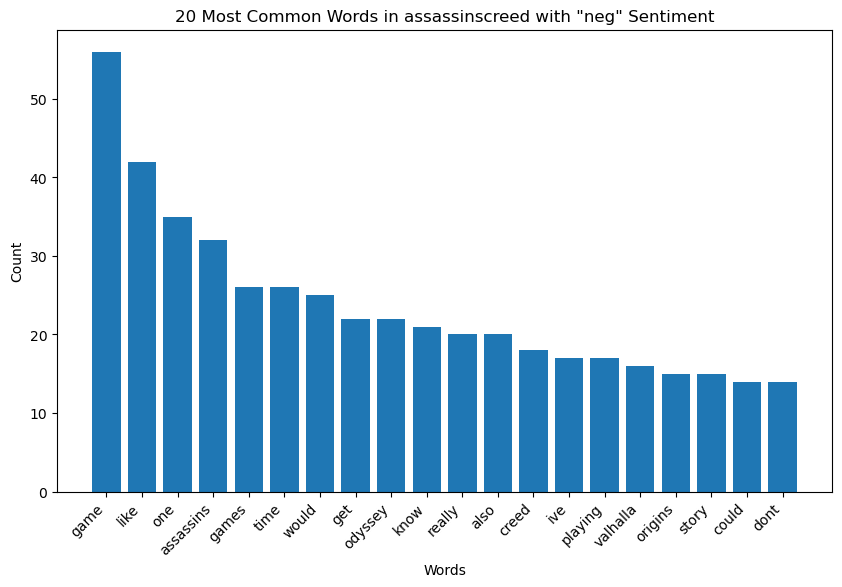

------------------------
------------------------
('assassinscreed', 'pos') :
game: 162
like: 129
would: 100
games: 89
one: 79
assassins: 76
story: 75
dont: 60
get: 58
time: 56
creed: 53
people: 49
also: 48
see: 46
valhalla: 45
know: 45
way: 44
think: 43
much: 40
want: 40


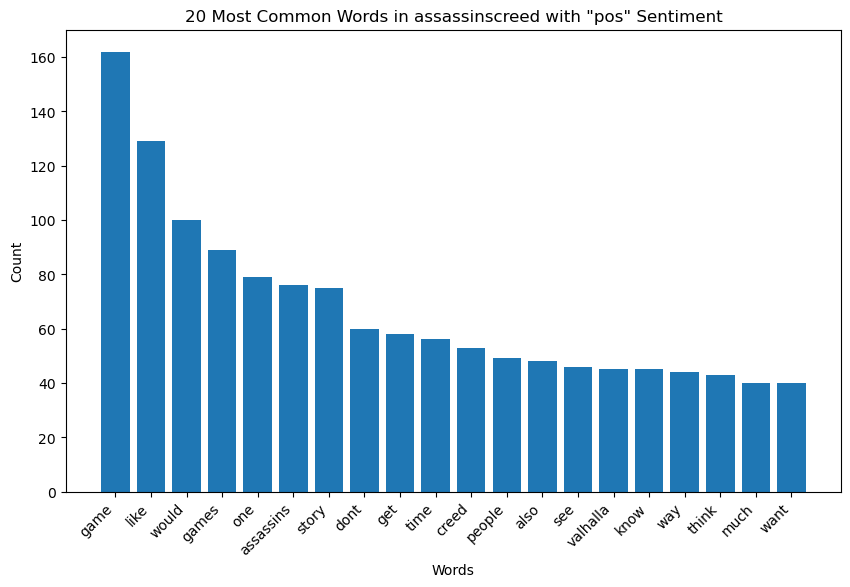

------------------------
------------------------
('legostarwars', 'neg') :
set: 22
clone: 15
would: 15
lego: 14
sets: 11
501st: 9
also: 8
know: 7
clones: 6
wars: 6
new: 6
like: 6
got: 6
could: 6
see: 6
one: 6
phase: 6
imperial: 5
ucs: 5
wondering: 5


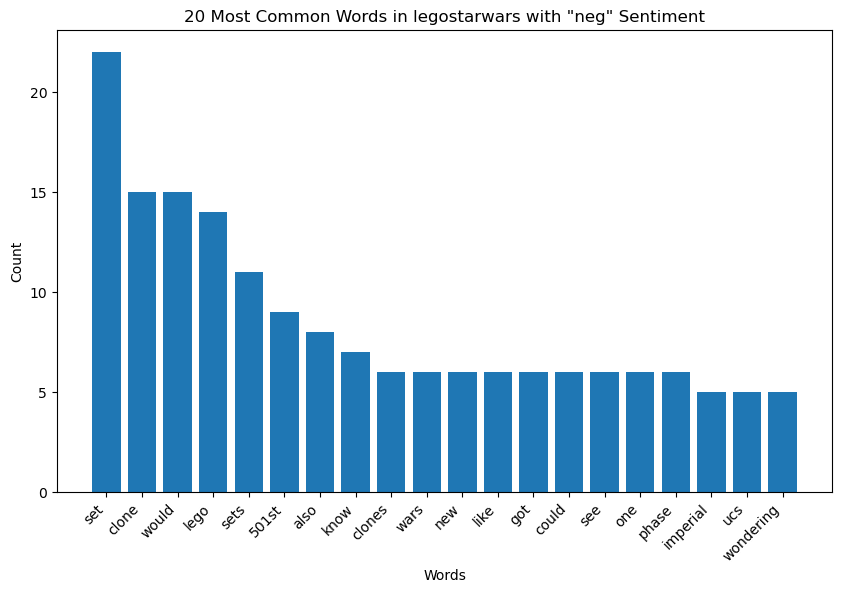

------------------------
------------------------
('legostarwars', 'pos') :
set: 31
would: 29
lego: 23
sets: 22
ask: 20
like: 20
anyone: 19
get: 18
want: 18
one: 18
something: 16
clone: 16
star: 16
really: 16
good: 15
wondering: 15
wars: 15
ampx200b: 14
questions: 13
use: 12


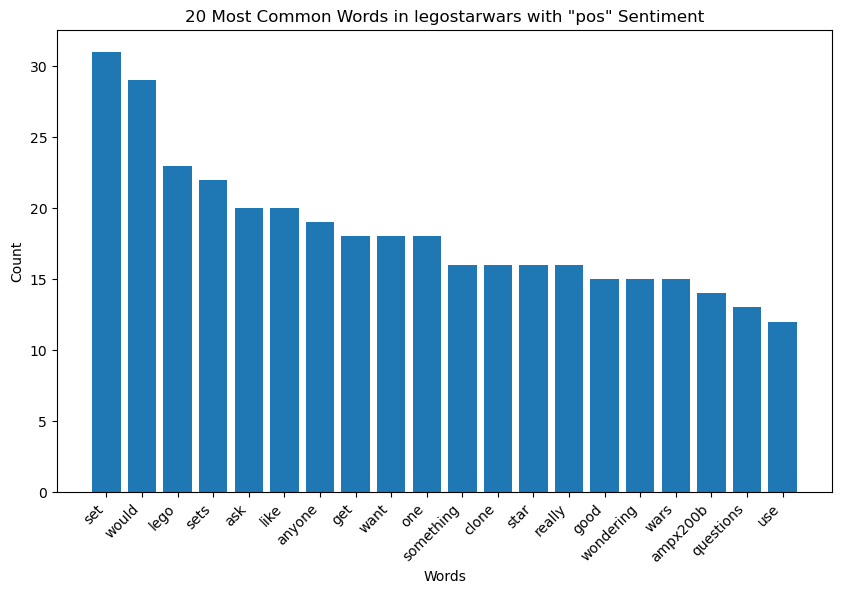

------------------------
------------------------
('pokemon', 'neg') :
pokemon: 175
like: 174
pokémon: 142
game: 116
would: 97
games: 85
one: 72
get: 68
think: 63
also: 62
really: 56
team: 54
new: 53
could: 53
know: 51
time: 51
make: 45
see: 44
even: 44
first: 44


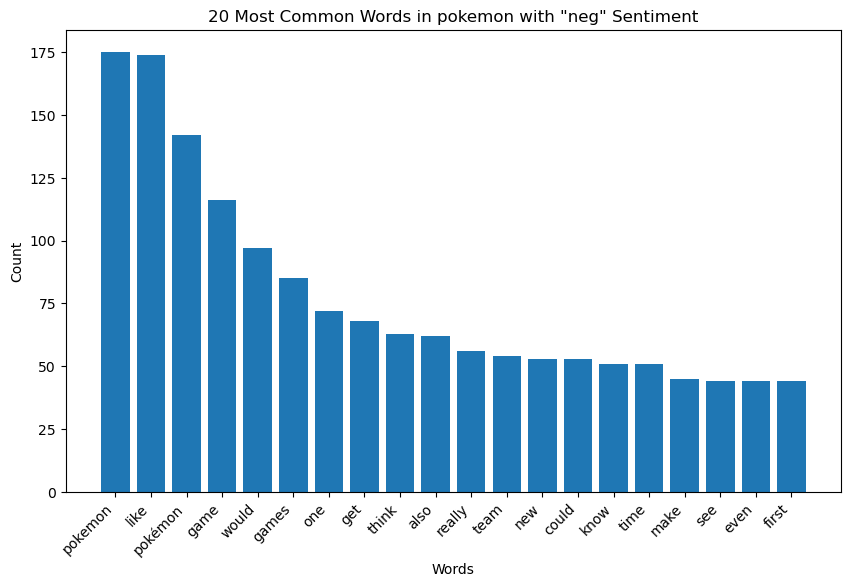

------------------------
------------------------
('pokemon', 'pos') :
pokemon: 630
pokémon: 494
game: 448
like: 430
would: 351
one: 315
games: 241
get: 234
dont: 232
think: 230
know: 204
also: 191
even: 191
really: 185
time: 179
ive: 157
new: 156
gen: 154
team: 151
could: 149


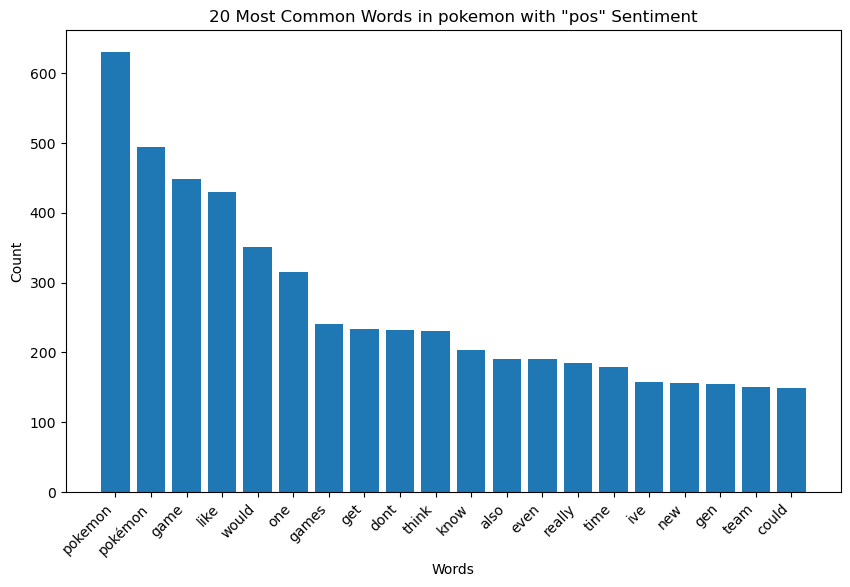

------------------------
------------------------
('thesims', 'neg') :
sims: 50
game: 27
get: 23
dont: 23
like: 23
one: 19
new: 17
know: 17
also: 16
play: 15
mods: 14
ive: 14
find: 14
way: 13
cant: 13
really: 13
even: 12
still: 12
sim: 12
playing: 11


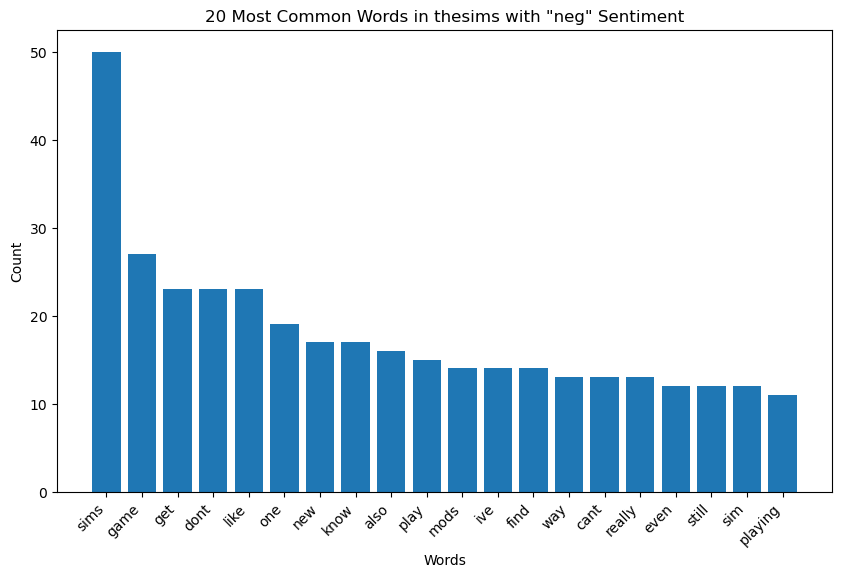

------------------------
------------------------
('thesims', 'pos') :
sims: 158
game: 92
ive: 65
like: 64
sim: 61
know: 61
dont: 60
get: 57
one: 52
play: 47
would: 44
lot: 40
cant: 40
new: 39
anyone: 39
even: 38
also: 34
mods: 33
still: 33
make: 32


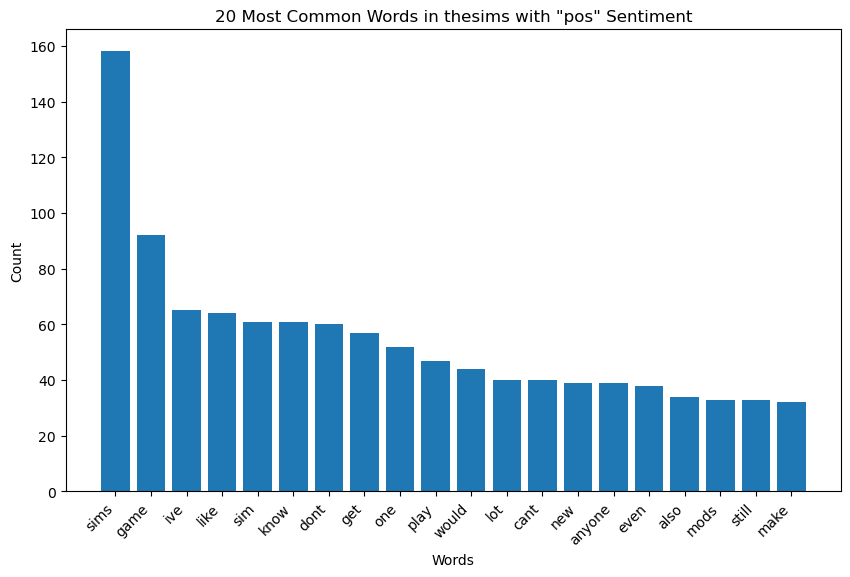

------------------------
------------------------


In [60]:
def find_most_common_words(text_column, n=5):
    # Preprocess the text (remove punctuation and convert to lowercase)
    text_column = text_column.str.lower().str.replace(r'[^\w\s]', '', regex=True)

    # Tokenize the text into words
    words = ' '.join(text_column).split()

    # Remove common stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words and len(word) > 2]

    # Count word frequencies
    word_counts = Counter(words)

    # Find the n most common words
    most_common_words = word_counts.most_common(n)
    return most_common_words


df_use=df[df['sentiment']!='neutral']

# Drop the missing values
df_filtered = df_use.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[deleted\]')]

grouped = filtered_df.groupby(['subreddit','sentiment'])

for category, group in grouped:
    category_df = pd.DataFrame(group)


    # Call the function with your DataFrame
    most_common_words = find_most_common_words(category_df['selftext'], n=20)

    print(category,":")

    # Print the 5 most common words and their frequencies
    for word, count in most_common_words:
        print(f"{word}: {count}")

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    plt.bar([word[0] for word in most_common_words], [count[1] for count in most_common_words])
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.title(f'20 Most Common Words in {category[0]} with "{category[1]}" Sentiment')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
    print("------------------------")
    print("------------------------")

In [41]:
df_use=df[df['sentiment']!='neutral']

# Drop the missing values
df_filtered = df_use.dropna(subset=['selftext'])

# Filter out rows containing '[removed]' and '[delete]'
filtered_df = df_filtered[~df_filtered['selftext'].str.contains(r'\[removed\]|\[deleted\]')]

filtered_df 

,subreddit,title,selftext,sentiment
17,assassinscreed,When should I go to the second arena is AC Ori...,I have completed both the bosses in the first ...,neg
23,FinalFantasy,Looking for Best Deal on FFVII Polygon Figure Set,I’ve been wanting the FFVII Mini Polygon Figur...,pos
24,assassinscreed,[Spoilers] The Ezio Trilogy is still the best ...,Since the RPG era started I don't see that muc...,pos
39,pokemon,Why don’t we get “third” (for lack of a better...,"After Red and Blue, we got Yellow.\n\nAfter Go...",pos
53,FIFA,Blown away by 23,I haven’t played FIFA since 20. I only buy spo...,pos
...,...,...,...,...
9968,pokemon,what do you expect in next presents,As pokémon day coming what do you expect in th...,pos
9969,assassinscreed,Valhalla PSA: People you can recruit to your c...,"I hadn't seen this posted before, but I discov...",neg
9974,Tetris,How to get faster?,I've been playing guideline for about a year o...,pos
9982,pokemon,Ditto ghosts stickers,Ditto transformed into the wrong ghost lol,pos
